In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq

# generate RCAL circuits to measure the readout errors on qubits [0, 1]
circuits = tq.make_rcal([0, 1])

# display the circuits
circuits[0]

Circuit(Cycle((0,): Gate.x, (1,): Gate.x),Cycle((0,): Meas(), (1,): Meas(), marker=1))

In [3]:
circuits[1]

Circuit(Cycle((0,): Gate.id, (1,): Gate.id),Cycle((0,): Meas(), (1,): Meas(), marker=1))

In [4]:
sim = tq.Simulator().add_readout_error(0.2)

# run the circuits on the simulator to populate their results
sim.run(circuits, n_shots=1000)

In [5]:
circuits.fit()

EstimateCollection(1)

In [6]:
tq.settings.set_dim(3)

circuits = tq.make_rcal([0, 1])

# display the circuits
circuits[0]

Circuit(Cycle((0,): Gate.x3pow2, (1,): Gate.x3pow2),Cycle((0,): Meas(), (1,): Meas(), marker=1))

In [7]:
circuits[1]

Circuit(Cycle((0,): Gate.x3, (1,): Gate.x3),Cycle((0,): Meas(), (1,): Meas(), marker=1))

In [8]:
circuits[2]

Circuit(Cycle((0,): Gate.id3, (1,): Gate.id3),Cycle((0,): Meas(), (1,): Meas(), marker=1))

In [9]:
sim = tq.Simulator().add_readout_error(0.2)
sim.run(circuits, n_shots=1000)

estimate = circuits.fit()
estimate

EstimateCollection(1)

In [10]:
circuit = tq.Circuit([{0: tq.Gate.f3}, {(0, 1): tq.Gate.cx3}])
circuit.measure_all()

circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

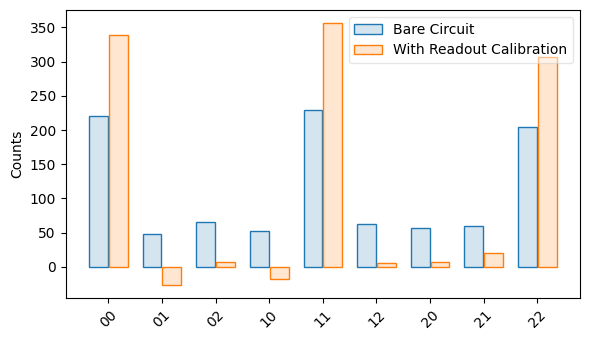

In [11]:
results = sim.sample(circuit, n_shots=1000)

tq.visualization.plot_results(
    results,
    estimate[0].apply_correction(results),
    labels=["Bare Circuit", "With Readout Calibration"],
)

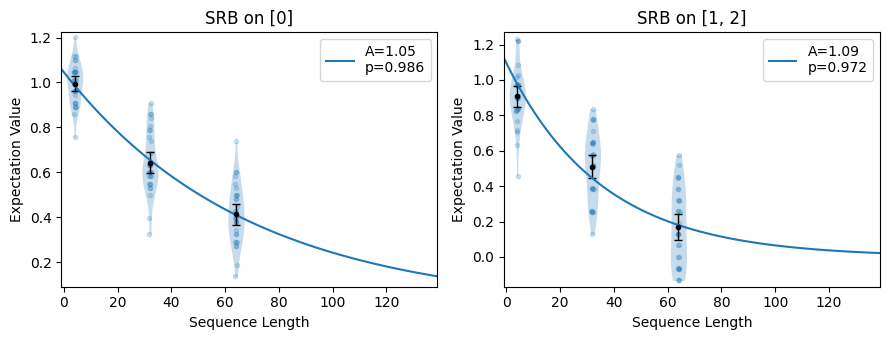

In [12]:
tq.settings.set_dim(2)

# generate RCAL circuits to measure the readout errors on three qubits [0, 1, 2]
circuits = tq.make_rcal([0, 1, 2])

# generate SRB circuits to simultaneously characterize a single qubit [0] and
# a pair of qubits [1, 2] with 30 circuits for each random cycle in [4, 32, 64]
circuits.append(tq.make_srb([[0], [1, 2]], [4, 32, 64], 30))

# initialize a noisy simulator with a 10% readout error
sim = tq.Simulator().add_stochastic_pauli(px=0.01).add_readout_error(0.1)

# RCAL generally needs more shots than the other protocols because it is estimating
# an absolute value rather than a decay over randomizations, thus in this simulation
# we use different numbers of shots for RCAL and SRB to populate their results
sim.run(circuits.subset(protocol="RCAL"), n_shots=1000)

# to simulate the SRB circuits, we create a subset that contains all circuits except
# those from RCAL, which we can achieve by using square brackets in our syntax:
sim.run(circuits.subset(protocol=["RCAL"]), n_shots=50)

# plot the exponential decay with readout correction,
# where each expectation value (dot) has been compensated
circuits.plot.raw()

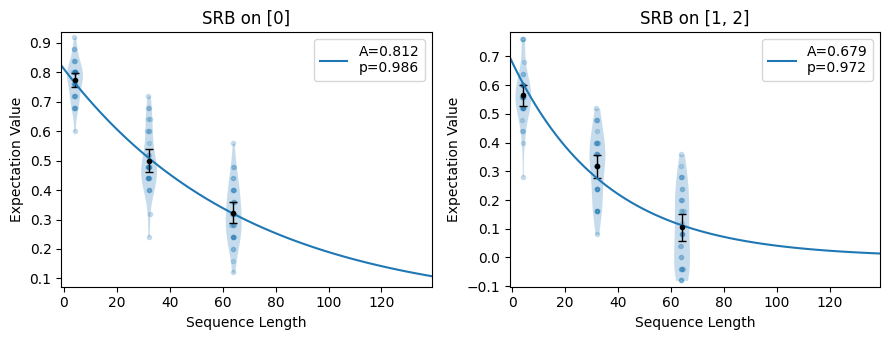

In [13]:
circuits.subset(protocol="SRB").plot.raw()